In [1]:
#Read dataset with pandas and show
import pandas as pd
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#Copy important Columns
data=df[["Pclass","Sex","Age","Survived"]].copy()

#Fill missing ages with mean of all
data["Age"]=data["Age"].fillna(data["Age"].mean())

#Convert sex to numerical value
data["Sex"]=data["Sex"].map({"male":0,"female":1})

#Show new database
data.head()

,Pclass,Sex,Age,Survived
0,3,0,22.0,0
1,1,1,38.0,1
2,3,1,26.0,1
3,1,1,35.0,1
4,3,0,35.0,0


In [3]:
#Split data and answer
X=data.drop("Survived",axis=1)
y=data["Survived"]

#Check shapes
print("Shape X:",X.shape)
print("Shape y:",y.shape)


Shape X: (891, 3)
Shape y: (891,)


In [4]:
#Import function for split data
from sklearn.model_selection import train_test_split

#Split data to train and test with test size:20%
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

#Show sizes after split
print("Train size:",X_train.shape[0])
print("Test size:",X_test.shape[0])


Train size: 712
Test size: 179


In [5]:
# To do:
'''use decision tree to learn data and calculate your acuracy''' 

#Import functions for create tree and accuracy check
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Initialize tree
#After some tests: We have best accuracy with depth=3
clf=DecisionTreeClassifier(max_depth=3,random_state=42)

#Train with trained data
clf.fit(X_train,y_train)

#Predict traned data and calculate accuracy
y_train_predict=clf.predict(X_train)
train_accuracy=accuracy_score(y_train,y_train_predict)

#Predict test data and calculate accuracy
y_test_predict=clf.predict(X_test)
test_accuracy=accuracy_score(y_test,y_test_predict)

#Show Results
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.8103932584269663
Test Accuracy: 0.8044692737430168


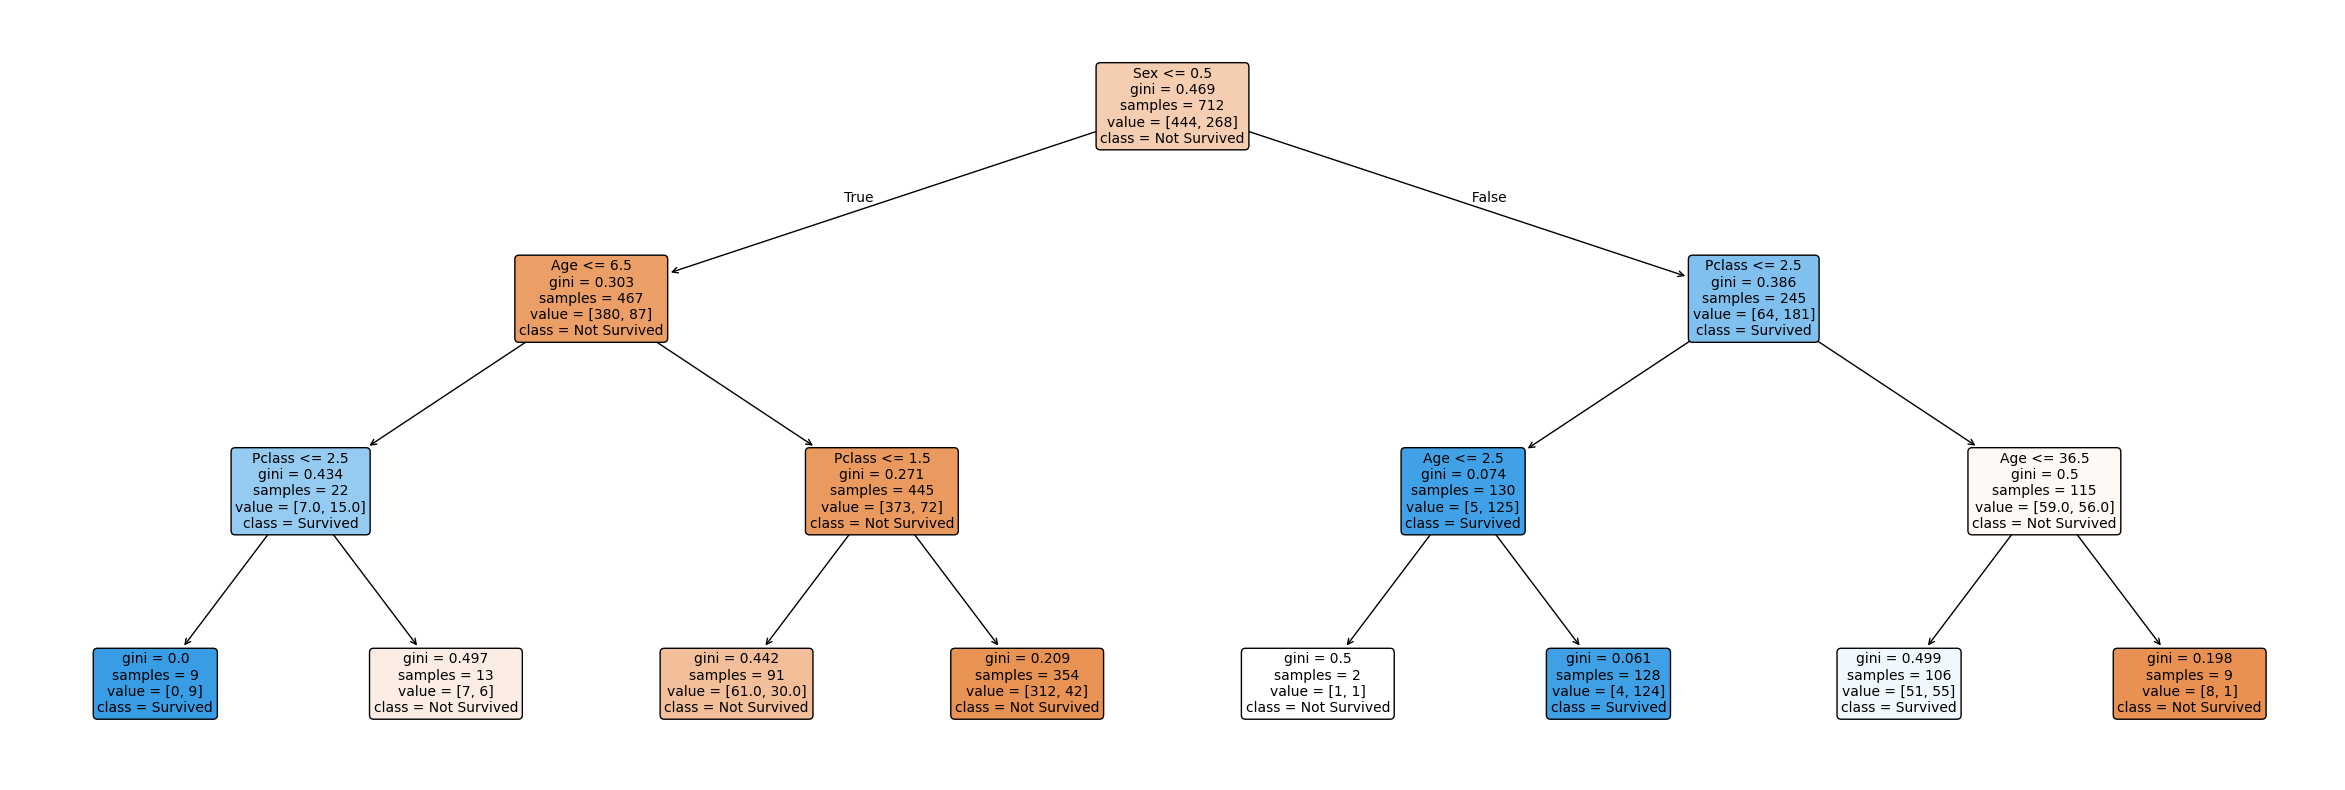

In [6]:
#Import modules for tree plot
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#Set plot size
plt.figure(figsize=(30,10))

#Plot tree with beautyful settings
plot_tree(clf,
          feature_names=X.columns,
          class_names=["Not Survived","Survived"],
          filled=True,rounded=True,fontsize=10)
plt.show()
